In [1]:
#P1

import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

# Read the text file
with open("fake news.txt", "r") as file:
    news_article = file.read()

# Tokenize the text into sentences
sentences = sent_tokenize(news_article)
print("Original Sentences (First 10):")
for i, sentence in enumerate(sentences[:10], start=1): 
    print(f"Sentence {i}: {sentence}")

# Tokenize each sentence into words
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
print("\nTokenized Sentences and Words (First 10):")
for i, tokenized_sentence in enumerate(tokenized_sentences[:10], start=1):  
    print(f"Sentence {i}: {tokenized_sentence}")

# Perform POS tagging on each tokenized sentence
tagged_sentences = [pos_tag(sentence) for sentence in tokenized_sentences]
print("\nPOS Tagged Sentences (First 10):")
for i, tagged_sentence in enumerate(tagged_sentences[:10], start=1): 
    print(f"Sentence {i}: {tagged_sentence}")

# Function to extract unique entities based on POS patterns and regular expressions
def extract_entities(tagged_sentences):
    entities = {
        'PERSON': set(),
        'ORGANIZATION': set(),
        'DATE': set(),
        'TIME': set(),
        'EMAIL': set(),
        'LOCATION': set()
    }  # Use sets to ensure uniqueness

    for sentence in tagged_sentences:
        sentence_text = ' '.join([word for word, tag in sentence])

        # Rule for detecting Person Names with titles
        person_matches = re.compile(r'\b(?:Mr|Mrs|Ms|Dr|Prof)\.?\s+(?:[A-Z][a-z]+\s+)?[A-Z][a-z]+\b').findall(sentence_text)
        entities['PERSON'].update(person_matches)

        # Rule for detecting Organizations
        organization_matches = re.compile(r'\b[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\s+(Inc|Ltd|Corp|Corporation|Company)\b').findall(sentence_text)
        entities['ORGANIZATION'].update(organization_matches)

        # Rule for detecting Dates
        date_matches = re.compile(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b|'
                                   r'\b(?:\d{1,2}(?:st|nd|rd|th)?\s+)?(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{4}\b|'
                                   r'\b\d{4}-\d{2}-\d{2}\b|'
                                   r'\b\d{1,2}\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{4}\b').findall(sentence_text)
        entities['DATE'].update(date_matches)

        # Rule for detecting Times
        time_matches = re.compile(r'\b\d{1,2}:\d{2}(:\d{2})?\s?(AM|PM|am|pm)?\b').findall(sentence_text)
        entities['TIME'].update(time_matches)

        # Rule for detecting Emails
        email_matches = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,7}\b').findall(sentence_text)
        entities['EMAIL'].update(email_matches)

        # Rule for detecting Locations using NNP and NNPS
        location = []
        for i, (word, tag) in enumerate(sentence):
            if tag in ['NNP', 'NNPS']:
                location.append(word)
            else:
                if len(location) > 1:  # If consecutive proper nouns are found
                    entities['LOCATION'].add(' '.join(location))
                location = []  # Reset for the next location sequence
        if len(location) > 1:  # Handle the case if location is at the end of the sentence
            entities['LOCATION'].add(' '.join(location))

    return entities

# Apply rules to extract entities
extracted_entities = extract_entities(tagged_sentences)

# Display recognized entities
print("\nRecognized Entities (Unique):")
for entity_type, entity_set in extracted_entities.items():
    print(f"{entity_type}: {list(entity_set)}") 


Original Sentences (First 10):
Sentence 1: Hi, everyone.
Sentence 2: A little bit of an afternoon delay.
Sentence 3: My name is Ms. Megan
Reichelt.
Sentence 4: I'm Mrs. Valerie Linsinbigler.
Sentence 5: Mr. Christopher Lowder.
Sentence 6: We are here to
talk to you about fake news, which has always been important but seems
to be just increasingly important as the deadline for elections loom.
Sentence 7: So we're looking at fake news within that place.
Sentence 8: So I want to get to
know you all a little bit and what brought you to the workshop.
Sentence 9: So if
you could go around and just say your name and who you are and start
with you?
Sentence 10: I'm Kate, I'm a graduate student, and I am studying Literacy
and Reading Education.

Tokenized Sentences and Words (First 10):
Sentence 1: ['Hi', ',', 'everyone', '.']
Sentence 2: ['A', 'little', 'bit', 'of', 'an', 'afternoon', 'delay', '.']
Sentence 3: ['My', 'name', 'is', 'Ms.', 'Megan', 'Reichelt', '.']
Sentence 4: ['I', "'m", 'Mrs.'

In [2]:
# P2

In [3]:
import spacy
from spacy import displacy
from spacy.tokens import Span
from spacy.training import Example
from spacy.pipeline import EntityRecognizer
from spacy.util import minibatch

# Load SpaCy's pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Read the text file again and save different from P1
with open("fake news.txt", "r") as file:
    text = file.read()

# (a) Statistical NER with SpaCy
# Process the text with SpaCy
doc = nlp(text)

# Display recognized entities and their types
print("Recognized Entities with SpaCy's Pre-trained Model:")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

# Visualize the entities in the text using displacy
displacy.render(doc, style="ent", jupyter=True)


Recognized Entities with SpaCy's Pre-trained Model:
afternoon (TIME)
Megan (PERSON)
Valerie Linsinbigler (PERSON)
Christopher Lowder (PERSON)
Kate (PERSON)
Reading Education (ORG)
Critical Literacy (ORG)
Critical Literacy (ORG)
Coleen (PRODUCT)
the Library and Access Services (ORG)
Stacey Remick-Simkins (PERSON)
English
Department (ORG)
David (PERSON)
Teaching and Learning Team (WORK_OF_ART)
today (DATE)
Hannah
Mclaughlin (PERSON)
Hannah (PERSON)
Fake or Real (WORK_OF_ART)
today (DATE)
two (CARDINAL)
Texas Popeye's (ORG)
Leaves Empty (ORG)
Hungry (ORG)
Washington (GPE)
Channel 4 News (ORG)
Chick-A-Fils (ORG)
Chick-A-Fils (ORG)
Chick-Fil-A (ORG)
Chick-Fil-A. (PERSON)
Chick-Fil-A. Yeah (ORG)
one (CARDINAL)
Popeye (PERSON)
Popeye (PERSON)
NBC (ORG)
Associated Press (ORG)
Associated Press (ORG)
Trump (PERSON)
AHTribune (GPE)
Channel 4 (ORG)
one (CARDINAL)
Last year (DATE)
Last year (DATE)
2019 (DATE)
2019 (DATE)
2019 (DATE)
29,202,552 (CARDINAL)
1,638,165 (CARDINAL)
2019 (DATE)
Trump (PERS

In [4]:
# (b) Extending NER with Custom Entities
# Annotating text with a new custom entity type - BRAND
custom_training_data = [
    ("Gunman Demands Chicken Sandwich from Texas Popeye's, Leaves Empty and the Hungry.", {"entities": [(41, 49, "BRAND")]}),
    ("Chick-Fil-A came out with that chicken sandwich.", {"entities": [(0, 11, "BRAND")]}),
    ("This is one of the fake news articles taken from InfoWars.", {"entities": [(51, 59, "BRAND")]}),
    ("BBC News covers global events outside of the United States.", {"entities": [(0, 8, "BRAND")]}),
    ("Fox News articles tend to have strong biases.", {"entities": [(0, 8, "BRAND")]}),
    ("Alternet was a source of many inflammatory articles during the elections.", {"entities": [(0, 8, "BRAND")]}),
    ("NPR provides a reliable and balanced view of the news.", {"entities": [(0, 3, "BRAND")]}),
  
]

# Create a blank model or extend the pre-trained pipeline
ner = nlp.get_pipe("ner")

# Add a new label to the NER pipeline
ner.add_label("BRAND")

# Update the model with custom training data
print("\nTraining custom entity recognizer for 'BRAND' entity...")
optimizer = nlp.resume_training()

# Convert training data to SpaCy's Example objects
examples = [Example.from_dict(nlp.make_doc(text), annotations) for text, annotations in custom_training_data]

# Training loop
for epoch in range(10):
    losses = {}
    batches = minibatch(examples, size=2)
    for batch in batches:
        nlp.update(batch, losses=losses, drop=0.35)
    print(f"Epoch {epoch + 1}, Loss: {losses['ner']}")


# Visualize entities using displacy
doc = nlp(text)
print("\nRecognized Entities with Custom Entity:")
for entity in doc.ents:
    if entity.label_ == "BRAND":
        print(f"Entity: {entity.text}, Type: {entity.label_}")



Training custom entity recognizer for 'BRAND' entity...
Epoch 1, Loss: 13.548103649133356
Epoch 2, Loss: 10.368766846073465
Epoch 3, Loss: 8.706648384555287
Epoch 4, Loss: 8.911890889955993
Epoch 5, Loss: 8.159613371640576
Epoch 6, Loss: 9.429218393823106


/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Gunman Demands Chicken Sandwich from Texas Popeye'..." with entities "[(41, 49, 'BRAND')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "This is one of the fake news articles taken from I..." with entities "[(51, 59, 'BRAND')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


Epoch 7, Loss: 6.521621999739596
Epoch 8, Loss: 7.157383990881099
Epoch 9, Loss: 5.636679326696651
Epoch 10, Loss: 5.44457145227863

Recognized Entities with Custom Entity:
Entity: Fox News put the story out there about how,
this was when Obama, it was during the last election and how he had
sold all of our most sensitive military planes to Saudi Arabia., Type: BRAND


In [5]:
# P3

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import spacy

# Load the dataset
file_path = 'news_data.csv'
news_data = pd.read_csv(file_path)

# Encode the news_category into numerical values
label_encoder = LabelEncoder()
news_data['category_encoded'] = label_encoder.fit_transform(news_data['news_category'])

# Combine headline and article into a single text field
news_data['combined_text'] = news_data['news_headline'] + " " + news_data['news_article']

# Split the dataset into training and testing sets
X = news_data['combined_text']
y = news_data['category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:

# Train the model
history = model.fit(X_train_tfidf, y_train, validation_split=0.2, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
10/10 [==============================] - 0s 6ms/step - loss: 1.9371 - accuracy: 0.1519 - val_loss: 1.9640 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 1.8877 - accuracy: 0.3544 - val_loss: 1.9754 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 1.8492 - accuracy: 0.3291 - val_loss: 1.9946 - val_accuracy: 0.0500
Epoch 4/50
 1/10 [==>...........................] - ETA: 0s - loss: 1.8817 - accuracy: 0.2500

2024-11-27 15:41:40.954136: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 0s 1ms/step - loss: 1.7830 - accuracy: 0.4684 - val_loss: 2.0157 - val_accuracy: 0.0500
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 1.7198 - accuracy: 0.4430 - val_loss: 2.0358 - val_accuracy: 0.0500
Epoch 6/50
10/10 [==============================] - 0s 1ms/step - loss: 1.6291 - accuracy: 0.4810 - val_loss: 2.0678 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 0s 1ms/step - loss: 1.5006 - accuracy: 0.5570 - val_loss: 2.1089 - val_accuracy: 0.0500
Epoch 8/50
10/10 [==============================] - 0s 1ms/step - loss: 1.3434 - accuracy: 0.6582 - val_loss: 2.1525 - val_accuracy: 0.0000e+00
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1778 - accuracy: 0.6962 - val_loss: 2.1612 - val_accuracy: 0.1000
Epoch 10/50
10/10 [==============================] - 0s 1ms/step - loss: 1.0018 - accuracy: 0.8101 - val_loss: 2.1361 - val_accuracy: 0.1000
Epoch 11/50
10/10 [===

Test Accuracy (TF-IDF only): 0.6000


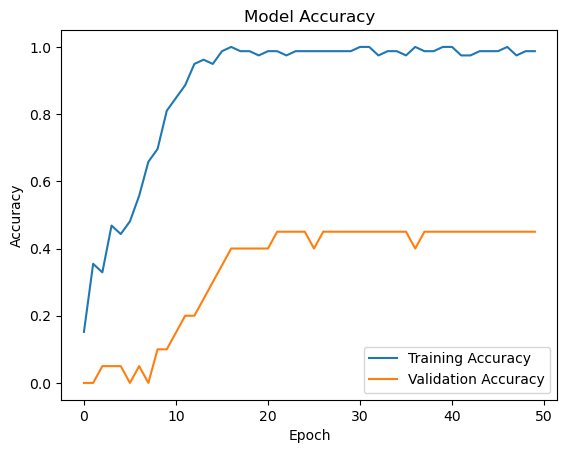

In [8]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f"Test Accuracy (TF-IDF only): {test_accuracy:.4f}")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

# Part (b): Enhance with Named Entity Recognition (NER)
nlp = spacy.load('en_core_web_sm')

# Select the top 20 TF-IDF features using ANOVA F-value, didn't help so commented out
#selector = SelectKBest(f_classif, k=20)
#X_train_tfidf_top20 = selector.fit_transform(X_train_tfidf, y_train)
#X_test_tfidf_top20 = selector.transform(X_test_tfidf)


# Extract named entities from the combined text field
def extract_named_entities(text):
    doc = nlp(text)
    return {ent.label_ for ent in doc.ents}

train_entities = [extract_named_entities(text) for text in X_train]
test_entities = [extract_named_entities(text) for text in X_test]

# Create binary dummy variables for NER features
all_entities = set.union(*train_entities, *test_entities)
entity_map = {entity: i for i, entity in enumerate(all_entities)}


In [14]:
def entities_to_features(entity_list, entity_map):
    features = np.zeros((len(entity_list), len(entity_map)))
    for i, entities in enumerate(entity_list):
        for entity in entities:
            if entity in entity_map:
                features[i, entity_map[entity]] = 1
    return features

X_train_ner = entities_to_features(train_entities, entity_map)
X_test_ner = entities_to_features(test_entities, entity_map)

# Combine TF-IDF and NER features
X_train_combined = np.hstack([X_train_tfidf, X_train_ner])
X_test_combined = np.hstack([X_test_tfidf, X_test_ner])


# Combine the top 20 TF-IDF features with NER features, didn't help so commented out
#X_train_combined = np.hstack([X_train_tfidf_top20, X_train_ner])
#X_test_combined = np.hstack([X_test_tfidf_top20, X_test_ner])

# Define the neural network architecture
enhanced_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_combined.shape[1],)), 
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  
])

# Compile the model
enhanced_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [17]:
# Train the enhanced model
enhanced_history = enhanced_model.fit(X_train_combined, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0996 - accuracy: 0.9620 - val_loss: 2.1538 - val_accuracy: 0.4500
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.9367 - val_loss: 2.2194 - val_accuracy: 0.4500
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9747 - val_loss: 2.2809 - val_accuracy: 0.3500
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9873 - val_loss: 2.2266 - val_accuracy: 0.3500
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9367 - val_loss: 2.0815 - val_accuracy: 0.4000
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0811 - accuracy: 0.9873 - val_loss: 2.0015 - val_accuracy: 0.4000
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.9747 - val_loss: 1.9928 - val_accuracy: 0.4000
Epoch 8/50
5/5 [==================

Test Accuracy (Enhanced with NER): 0.6000


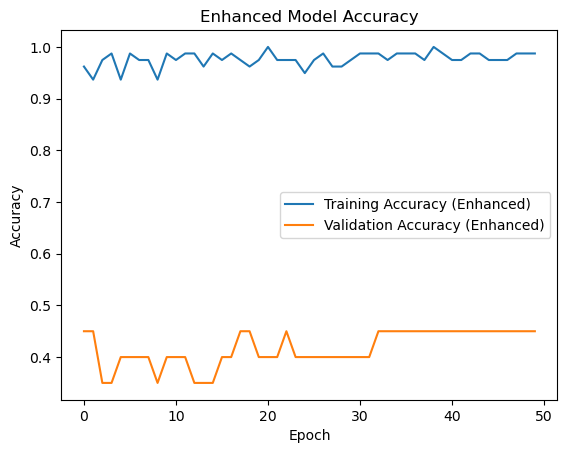

Random Guess Accuracy: 0.1429


In [18]:
# Evaluate the enhanced model
enhanced_test_loss, enhanced_test_accuracy = enhanced_model.evaluate(X_test_combined, y_test, verbose=0)
print(f"Test Accuracy (Enhanced with NER): {enhanced_test_accuracy:.4f}")

# Plot the enhanced model's training and validation accuracy
plt.plot(enhanced_history.history['accuracy'], label='Training Accuracy (Enhanced)')
plt.plot(enhanced_history.history['val_accuracy'], label='Validation Accuracy (Enhanced)')
plt.title('Enhanced Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate baseline accuracy for random guessing
random_guess_accuracy = 1 / len(label_encoder.classes_)
print(f"Random Guess Accuracy: {random_guess_accuracy:.4f}")